In [35]:
import timeit

import warnings
warnings.filterwarnings("ignore")

# imports best practice pandas
import os

import numpy as np
import pandas as pd
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline
import math
import pickle
import gzip

import inspect
import plotly.graph_objects as go

#--------------------------------------------------------
# imports best practice sklearn
import sklearn
from sklearn.feature_selection import VarianceThreshold
from sklearn import set_config

from sklearn.tree import DecisionTreeClassifier

# preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder, RobustScaler, MinMaxScaler
from scipy import stats

# transformers
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import FunctionTransformer


from sklearn.cluster import KMeans

# evaluacion
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

# pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
set_config(transform_output = "pandas")

#models
from sklearn.cluster import KMeans

### Funciones Útiles

In [36]:
# Función para lista de variables

def listarNulos(dataset):
    df_stat = dataset.isnull().sum()[(dataset.isnull().sum()>0)].sort_values(ascending=False).to_frame()
    df_stat.rename(columns={0: 'Nulos'}, inplace = True)
    percent = (df_stat["Nulos"]/dataset.shape[0]).mul(100)
    df_stat["porcentaje"] = percent.round(2)
    return df_stat


def obtener_lista_variables(dataset,target="",index=""):


  lista_numericas = []
  lista_boolean = []
  lista_categoricas = []
  lista_fecha = []

  for i in dataset:
    print(i)
    if ((dataset[i].dtype.kind == 'i') or (dataset[i].dtype.kind == 'f')) and i not in target and i not in index\
    and len(dataset[i].unique()) != 2:
      lista_numericas.append(i)

    elif ((dataset[i].dtype.kind == 'i') or (dataset[i].dtype.kind == 'f') or (dataset[i].dtype.kind == 'b')) and i not in target and i not in index\
    and len(dataset[i].unique()) == 2:
      lista_boolean.append(i)

    elif (dataset[i].dtype.kind == 'O') and i not in target and i not in index:
      lista_categoricas.append(i)
      
    elif (dataset[i].dtype.kind == 'M') and i not in target and i not in index:
      lista_fecha.append(i)

  return lista_numericas, lista_boolean, lista_categoricas, lista_fecha



def generar_grafico_radar(categories, values,title_gra, color_gra):

    # generar figura
    fig = go.Figure()

    # Adicionar trace para la série de dadtos
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories,
        fill='toself',
        #line=dict(color='blue')
        line=dict(color=color_gra)
    ))

    # Actualizar layout
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                #range=[0, max(values)]  # Escala adaptable
                range=[0, 1]  
            )),
            
        showlegend=False,
        title=title_gra,
        font=dict(
            family='Arial, sans-serif',
            size=18,
            color='black'
        ),
        margin=dict(
            l=30,
            r=30,
            t=40,
            b=30
        ),
        polar_angularaxis_rotation=0,  # Rotacionando os rótulos do eixo angular em 90 graus
        width=950,  # anchura
        height=500  # altura
    )

    return fig


### Carga de Datasets

In [37]:
DATA_PATH = "../../data/processed/"
FILE_NAME = "df_capstone_newFeatures.pkl.gz"
PICKLE_PATH = DATA_PATH+FILE_NAME

# Usa gzip.open para abrir el archivo comprimido
with gzip.open(DATA_PATH+FILE_NAME, 'rb') as gz_csv_file:
    df_capstone_clean = pd.read_pickle(gz_csv_file)

print("DataFrame cargado exitosamente")

DataFrame cargado exitosamente


In [38]:
lnum, lbool, lcat, ldate = obtener_lista_variables(df_capstone_clean)

pk_cid
pk_partition
entry_date
entry_channel
active_customer
segment
short_term_deposit
loans
mortgage
funds
securities
long_term_deposit
em_account_pp
credit_card
payroll
pension_plan
payroll_account
emc_account
debit_card
em_account_p
em_acount
country_id
region_code
gender
age
deceased
salary
age_cat
regions_ca_id
customer_acquisition_channel
customer_acquisition_channel_min
nr_product
nr_accounts
nr_saving_and_investment
nr_financing
nr_product_max
nr_product_gap_to_max
nr_investment
product_mix_diversity
salary_CA
customer_tenure
digital_interaction_index
financial_health_score
entry_channel_salary
entry_channel_loyalty
periods_active
season
entry_date_month
entry_date_year
working_day
loan_utilization_index
ES_Flag
total_products
client_fidelity
nr_debt
entry_channel_product
channel_activity_level
nr_product_trend
months_from_last_purchase
date_last_purchase
nr_financing_60
nr_invest_savings_40
nr_account_10
nr_financing_60_trend
nr_invest_savings_40_trend
nr_account_10_trend
cus

In [39]:
print(lnum)

['pk_cid', 'em_account_pp', 'age', 'salary', 'nr_product', 'nr_accounts', 'nr_saving_and_investment', 'nr_financing', 'nr_product_max', 'nr_product_gap_to_max', 'nr_investment', 'product_mix_diversity', 'salary_CA', 'customer_tenure', 'digital_interaction_index', 'financial_health_score', 'entry_channel_salary', 'entry_channel_loyalty', 'periods_active', 'entry_date_month', 'entry_date_year', 'total_products', 'nr_debt', 'channel_activity_level', 'nr_product_trend', 'months_from_last_purchase', 'nr_financing_60', 'nr_invest_savings_40', 'nr_account_10', 'nr_financing_60_trend', 'nr_invest_savings_40_trend', 'nr_account_10_trend', 'customer_lifetime_value_partition', 'customer_lifetime_value_cumsum', 'saving_behavior', 'nr_risk_low', 'nr_risk_high', 'percent_risk_low', 'percent_risk_high', 'risk_index_absolute', 'active_customer_rate', 'months_from_last_purchase_digital', 'total_products_ratio', 'nr_transactions', 'profit_60', 'profit_40', 'profit_10', 'total_profit_customer']


In [40]:
lnum.remove('em_account_pp')
lbool.append('em_account_pp')

print(lnum)

['pk_cid', 'age', 'salary', 'nr_product', 'nr_accounts', 'nr_saving_and_investment', 'nr_financing', 'nr_product_max', 'nr_product_gap_to_max', 'nr_investment', 'product_mix_diversity', 'salary_CA', 'customer_tenure', 'digital_interaction_index', 'financial_health_score', 'entry_channel_salary', 'entry_channel_loyalty', 'periods_active', 'entry_date_month', 'entry_date_year', 'total_products', 'nr_debt', 'channel_activity_level', 'nr_product_trend', 'months_from_last_purchase', 'nr_financing_60', 'nr_invest_savings_40', 'nr_account_10', 'nr_financing_60_trend', 'nr_invest_savings_40_trend', 'nr_account_10_trend', 'customer_lifetime_value_partition', 'customer_lifetime_value_cumsum', 'saving_behavior', 'nr_risk_low', 'nr_risk_high', 'percent_risk_low', 'percent_risk_high', 'risk_index_absolute', 'active_customer_rate', 'months_from_last_purchase_digital', 'total_products_ratio', 'nr_transactions', 'profit_60', 'profit_40', 'profit_10', 'total_profit_customer']


In [41]:
print(lbool)

['active_customer', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account', 'debit_card', 'em_account_p', 'em_acount', 'deceased', 'working_day', 'loan_utilization_index', 'ES_Flag', 'nr_risk_medium', 'percent_risk_medium', 'em_account_pp']


In [42]:
print(lcat)

['entry_channel', 'segment', 'country_id', 'region_code', 'gender', 'age_cat', 'regions_ca_id', 'customer_acquisition_channel', 'customer_acquisition_channel_min', 'season', 'client_fidelity', 'entry_channel_product', 'life_stage_indicator', 'regions_cluster']


In [43]:
print(ldate)

['pk_partition', 'entry_date', 'date_last_purchase', 'date_last_purchase_digital']


In [44]:
if len(df_capstone_clean.columns) - (len(lnum) + len(lbool) + len(lcat) + len(ldate)) == 0:
    print('Todas las columnas incluídas en las listas de variables')
else:
    print('Revisar, no todas las columnas están incluídas')

Todas las columnas incluídas en las listas de variables


In [45]:
df_capstone_clean_2 = df_capstone_clean.copy()

### Agrupaciones para reducir cardinalidad

### region_code

In [46]:
df_capstone_clean_2['region_code'].info()
df_capstone_clean_2[['region_code']].head()

<class 'pandas.core.series.Series'>
Int64Index: 5962924 entries, 1479563 to 5679912
Series name: region_code
Non-Null Count    Dtype 
--------------    ----- 
5962924 non-null  object
dtypes: object(1)
memory usage: 91.0+ MB


,region_code
1479563,28.0
2168122,28.0
2962973,28.0
3628236,28.0
4028169,28.0


In [47]:
df_capstone_clean_2['region_code'].value_counts(dropna=False)

28.0          1185757
8.0            600362
46.0           358142
30.0           296856
41.0           290447
15.0           254891
29.0           187911
36.0           175850
3.0            171358
11.0           160894
33.0           134562
50.0           132983
6.0            122587
35.0           121982
47.0           116948
18.0           102789
45.0           102328
37.0            92538
10.0            83283
14.0            75405
2.0             72071
21.0            72037
13.0            70092
39.0            69589
12.0            68721
7.0             62436
32.0            54639
27.0            52783
43.0            51782
17.0            50749
9.0             47746
25.0            46887
16.0            36094
24.0            35426
48.0            35256
26.0            34790
4.0             32680
31.0            31241
49.0            30965
23.0            30955
38.0            29001
34.0            27545
19.0            26762
40.0            21658
5.0             21300
22.0      

In [48]:
print(df_capstone_clean_2['region_code'].unique())
print('')
print('')
print(f'{df_capstone_clean_2["region_code"].nunique()} valores únicos')

['28.0' '8.0' '41.0' '46.0' '24.0' '39.0' '3.0' '31.0' '15.0' '2.0' '45.0'
 '40.0' '30.0' '50.0' '35.0' '13.0' '21.0' '27.0' '47.0' '6.0' '36.0'
 '37.0' '29.0' '14.0' '12.0' '18.0' '16.0' '19.0' '33.0' '9.0' '48.0'
 '25.0' '11.0' '7.0' '42.0' '10.0' '17.0' '52.0' 'Extranjero' '23.0' '4.0'
 '43.0' '26.0' '38.0' '44.0' '49.0' '20.0' '32.0' '1.0' '5.0' '22.0'
 '34.0' '51.0']


53 valores únicos


In [49]:
# propuesta de agrupar regiones a comunidades autonomas

mapeo = {1.0: "PV", 2.0: "CM",  3.0: "VC",  4.0: "AN",  5.0: "CL",  6.0: "EX", 7.0: "IB",  8.0: "CT",  9.0: "CL", 10.0: "EX", 11.0: "AN", 
         12.0: "VC", 13.0: "CM", 14.0: "AN", 15.0: "GA", 16.0: "CM", 17.0: "CT", 18.0: "AN", 19.0: "CM", 20.0: "PV", 21.0: "AN", 22.0: "AR", 
         23.0: "AN", 24.0: "CL", 25.0: "CT", 26.0: "RI", 27.0: "GA", 28.0: "MD", 29.0: "AN", 30.0: "MC", 31.0: "NC", 32.0: "GA", 33.0: "AS", 34.0: "CL", 
         35.0: "CN", 36.0: "GA", 37.0: "CL", 38.0: "CN", 39.0: "CB", 40.0: "CL", 41.0: "AN",  42.0: "CL", 43.0: "CT", 44.0: "AR", 45.0: "CM", 46.0: "VC", 
         47.0: "CL", 48.0: "PV",  49.0: "CL", 50.0: "AR", 51.0: "CE", 52.0: "ML"}

In [50]:
df_capstone_clean_2['regions_ca_id'] = df_capstone_clean_2['region_code'].apply(lambda x: mapeo.get(float(x)) if x != 'Extranjero' else x)

In [51]:
print(df_capstone_clean_2['regions_ca_id'].unique())
print('')
print('')
print(f'{df_capstone_clean_2["regions_ca_id"].nunique()} valores únicos')

['MD' 'CT' 'AN' 'VC' 'CL' 'CB' 'NC' 'GA' 'CM' 'MC' 'AR' 'CN' 'EX' 'AS'
 'PV' 'IB' 'ML' 'Extranjero' 'RI' 'CE']


20 valores únicos


In [52]:
df_capstone_clean_2[['region_code','regions_ca_id']].info()
df_capstone_clean_2[['region_code','regions_ca_id']].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 1479563 to 5679912
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   region_code    object
 1   regions_ca_id  object
dtypes: object(2)
memory usage: 136.5+ MB


,region_code,regions_ca_id
1479563,28.0,MD
2168122,28.0,MD
2962973,28.0,MD
3628236,28.0,MD
4028169,28.0,MD


In [53]:
df_capstone_clean_2['regions_ca_id'].value_counts(dropna=False)

MD            1185757
AN             953118
CT             749780
VC             598221
GA             538163
CL             402626
CM             307347
MC             296856
EX             205870
AR             166711
CN             150983
AS             134562
CB              69589
PV              67088
IB              62436
RI              34790
NC              31241
CE               2896
ML               2638
Extranjero       2252
Name: regions_ca_id, dtype: int64

### entry_channel

In [54]:
df_capstone_clean_2['entry_channel'].info()
df_capstone_clean_2[['entry_channel']].head()

<class 'pandas.core.series.Series'>
Int64Index: 5962924 entries, 1479563 to 5679912
Series name: entry_channel
Non-Null Count    Dtype 
--------------    ----- 
5962924 non-null  object
dtypes: object(1)
memory usage: 91.0+ MB


,entry_channel
1479563,KAT
2168122,KAT
2962973,KAT
3628236,KAT
4028169,KAT


In [55]:
df_capstone_clean_2['entry_channel'].value_counts(dropna=False)

KHE    3116090
KFC     898070
KHQ     666987
KAT     416522
KHK     231300
        ...   
KHS         10
KEJ          8
KFP          2
KDA          2
KDS          1
Name: entry_channel, Length: 68, dtype: int64

In [56]:
print(df_capstone_clean_2['entry_channel'].unique())
print('')
print('')
print(f'{df_capstone_clean_2["entry_channel"].nunique()} valores únicos')

['KAT' 'KHN' 'KFA' '007' 'KHM' 'KHC' 'RED' 'KFC' 'KHK' 'KBG' 'KHO' 'KHL'
 'KHQ' '013' 'KHE' 'KAS' 'KBZ' 'KAY' 'KBE' 'KBO' 'KBW' 'KAB' 'KDS' 'KBU'
 'KES' 'KCB' 'KCL' 'KAG' 'KDR' 'KCK' 'KDA' 'KDT' 'KCC' 'KAD' 'KAF' '004'
 'KAA' 'KAH' 'KAI' 'KEY' 'KAW' 'KAE' 'KFD' 'KHD' 'KAM' 'KBY' 'KBH' 'KEJ'
 'KAZ' 'KCH' 'KCI' 'KAR' 'KAQ' 'KAJ' 'KFP' 'KFL' 'KFS' 'KFF' 'KGX' 'KDH'
 'KEH' 'KGC' 'KGN' 'KHF' 'KFK' 'KAK' 'KHP' 'KHS']


68 valores únicos


In [57]:
# agrupar por canal de entrada


# Categoría para RED
df_capstone_clean_2.loc[df_capstone_clean_2['entry_channel'] == 'RED', 'customer_acquisition_channel'] = 'RED'

# Categoría para valores numéricos
df_capstone_clean_2.loc[df_capstone_clean_2['entry_channel'].str.isnumeric(), 'customer_acquisition_channel'] = 'Numeric'

# Categorías por prefijo para el resto
df_capstone_clean_2.loc[
    ~df_capstone_clean_2['entry_channel'].isin(['RED']) & 
    ~df_capstone_clean_2['entry_channel'].str.isnumeric(), 'customer_acquisition_channel'
] = df_capstone_clean_2['entry_channel'].str[:2]

In [58]:
print(df_capstone_clean_2['regions_ca_id'].unique())
print('')
print('')
print(f'{df_capstone_clean_2["regions_ca_id"].nunique()} valores únicos')

['MD' 'CT' 'AN' 'VC' 'CL' 'CB' 'NC' 'GA' 'CM' 'MC' 'AR' 'CN' 'EX' 'AS'
 'PV' 'IB' 'ML' 'Extranjero' 'RI' 'CE']


20 valores únicos


In [59]:
df_capstone_clean_2[['entry_channel','customer_acquisition_channel']].info()
df_capstone_clean_2[['entry_channel','customer_acquisition_channel']].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 1479563 to 5679912
Data columns (total 2 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   entry_channel                 object
 1   customer_acquisition_channel  object
dtypes: object(2)
memory usage: 265.5+ MB


,entry_channel,customer_acquisition_channel
1479563,KAT,KA
2168122,KAT,KA
2962973,KAT,KA
3628236,KAT,KA
4028169,KAT,KA


In [60]:
df_capstone_clean_2['customer_acquisition_channel'].value_counts(dropna=False)

KH         4496434
KF          977585
KA          423886
RED          60899
KB            1949
Numeric       1031
KE             767
KC             229
KD              93
KG              51
Name: customer_acquisition_channel, dtype: int64

In [61]:
for col in df_capstone_clean_2.columns:
    print(col)

pk_cid
pk_partition
entry_date
entry_channel
active_customer
segment
short_term_deposit
loans
mortgage
funds
securities
long_term_deposit
em_account_pp
credit_card
payroll
pension_plan
payroll_account
emc_account
debit_card
em_account_p
em_acount
country_id
region_code
gender
age
deceased
salary
age_cat
regions_ca_id
customer_acquisition_channel
customer_acquisition_channel_min
nr_product
nr_accounts
nr_saving_and_investment
nr_financing
nr_product_max
nr_product_gap_to_max
nr_investment
product_mix_diversity
salary_CA
customer_tenure
digital_interaction_index
financial_health_score
entry_channel_salary
entry_channel_loyalty
periods_active
season
entry_date_month
entry_date_year
working_day
loan_utilization_index
ES_Flag
total_products
client_fidelity
nr_debt
entry_channel_product
channel_activity_level
nr_product_trend
months_from_last_purchase
date_last_purchase
nr_financing_60
nr_invest_savings_40
nr_account_10
nr_financing_60_trend
nr_invest_savings_40_trend
nr_account_10_trend
cus

In [62]:
#report_df(df_capstone_clean_2)
listarNulos(df_capstone_clean_2)

#df_capstone_clean_2.head()

,Nulos,porcentaje


### Agrupamento de variables por naturaleza

In [63]:
df_capstone_clean_2.columns

Index(['pk_cid', 'pk_partition', 'entry_date', 'entry_channel',
       'active_customer', 'segment', 'short_term_deposit', 'loans', 'mortgage',
       'funds', 'securities', 'long_term_deposit', 'em_account_pp',
       'credit_card', 'payroll', 'pension_plan', 'payroll_account',
       'emc_account', 'debit_card', 'em_account_p', 'em_acount', 'country_id',
       'region_code', 'gender', 'age', 'deceased', 'salary', 'age_cat',
       'regions_ca_id', 'customer_acquisition_channel',
       'customer_acquisition_channel_min', 'nr_product', 'nr_accounts',
       'nr_saving_and_investment', 'nr_financing', 'nr_product_max',
       'nr_product_gap_to_max', 'nr_investment', 'product_mix_diversity',
       'salary_CA', 'customer_tenure', 'digital_interaction_index',
       'financial_health_score', 'entry_channel_salary',
       'entry_channel_loyalty', 'periods_active', 'season', 'entry_date_month',
       'entry_date_year', 'working_day', 'loan_utilization_index', 'ES_Flag',
       'total_p

In [64]:
#Variables originales
list_var_original=["pk_cid", 'pk_partition', 'entry_date', 'entry_channel', 'active_customer','segment', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount', 'country_id', 'region_code', 'gender', 'age', 'deceased', 'salary']


#variables generadas
list_var_generated = ['age_cat', 'regions_ca_id',
       'customer_acquisition_channel', 'nr_product', 'nr_accounts',
       'nr_saving_and_investment', 'nr_financing', 'nr_product_max',
       'nr_product_gap_to_max', 'nr_investment', 'product_mix_diversity',
       'salary_CA', 'customer_tenure', 'digital_interaction_index',
       'financial_health_score', 'entry_channel_salary',
       'entry_channel_loyalty', 'periods_active', 'season', 'entry_date_month',
       'entry_date_year', 'working_day', 'loan_utilization_index', 'ES_Flag',
       'client_fidelity', 'total_products', 'nr_debt', 'entry_channel_product',
       'channel_activity_level', 'nr_product_trend', 'nr_financing_60',
       'nr_invest_savings_40', 'nr_account_10', 'nr_financing_60_trend',
       'nr_invest_savings_40_trend', 'nr_account_10_trend', 'saving_behavior',
       'nr_risk_low', 'nr_risk_medium', 'nr_risk_high', 'percent_risk_low',
       'percent_risk_medium', 'percent_risk_high', 'risk_index_absolute',
       'life_stage_indicator', 'customer_lifetime_value_partition',
       'customer_lifetime_value_cumsum', 'months_from_last_purchase',
       'date_last_purchase', 'active_customer_rate',
       'months_from_last_purchase_digital', 'date_last_purchase_digital',
       'total_products_ratio',"regions_cluster","customer_acquisition_channel_min"]


list_time = ['periods_active', 'entry_date_year', 'working_day']

#caracteristicas socio/demograficas
list_socio = ['age_cat', 'regions_ca_id',"regions_cluster", "life_stage_indicator",'salary_CA', 'ES_Flag' ]

list_marketing = ['customer_acquisition_channel',"customer_acquisition_channel_min", 'entry_channel_loyalty',
                  'entry_date_month','entry_channel_salary','entry_channel_product','channel_activity_level']

#Caracteristicas económicas
list_economics =['customer_lifetime_value_partition', 'customer_lifetime_value_cumsum','financial_health_score']

#Frecuencia de compra
list_frecuency = ['months_from_last_purchase_digital', 'date_last_purchase_digital','date_last_purchase', 'months_from_last_purchase']

#productos
list_prod = ['nr_product', 'nr_accounts', 'nr_saving_and_investment', 'nr_financing', 'nr_product_max','nr_product_gap_to_max', 'nr_investment', 
             'product_mix_diversity','nr_financing_60', 'nr_invest_savings_40', 'nr_account_10','nr_risk_low', 'nr_debt','total_products','total_products_ratio']

#clientes más activos/tendencia
list_trend = ['nr_financing_60_trend','nr_invest_savings_40_trend', 'nr_account_10_trend','nr_product_trend','season']

#tiempo/relacionamento = 
list_relationship = ['customer_tenure','client_fidelity']

#compoartamiento
list_behavior = ['loan_utilization_index','saving_behavior','nr_risk_medium', 'nr_risk_high', 'percent_risk_low',
       'percent_risk_medium', 'percent_risk_high', 'risk_index_absolute','active_customer_rate','digital_interaction_index']

len(list_time + list_socio + list_marketing + list_economics + list_frecuency + list_prod + list_trend + list_relationship + list_behavior) == len(list_var_generated)


True

In [65]:
set(list_var_generated) - set(list_time + list_socio + list_marketing + list_economics + list_frecuency + list_prod + list_trend + list_relationship + list_behavior)
set(list_time + list_socio + list_marketing + list_economics + list_frecuency + list_prod + list_trend + list_relationship + list_behavior) - set(list_var_generated) 

set()

### Selección de variables para clustering


In [66]:

# #Variables originales
# list_var_original=['pk_partition', 'entry_date', 'entry_channel', 'active_customer','segment', 'short_term_deposit', 'loans', 'mortgage', 'funds',
#        'securities', 'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account',
#        'debit_card', 'em_account_p', 'em_acount', 'country_id', 'region_code', 'gender', 'age', 'deceased', 'salary']

list_var_original_toCluster=['pk_cid','segment', 'age']

# #caracteristicas temporales
# list_time_toCluster = ['periods_active', 'entry_date_year', 'working_day']

list_time_toCluster = []

##caracteristicas socio/demograficas
#list_socio_toCluster = ['age_cat', 'regions_ca_id',"regions_cluster", "life_stage_indicator",'salary_CA', 'ES_Flag' ]

list_socio_toCluster = []


# #caracteristicas de marketing
# list_marketing_toCluster = ['customer_acquisition_channel',"customer_acquisition_channel_min", 'entry_channel_loyalty',
#                   'entry_date_month','entry_channel_salary','entry_channel_product','channel_activity_level']

list_marketing_toCluster = []

# #Caracteristicas económicas
# list_economics_toCluster =['customer_lifetime_value_partition', 'customer_lifetime_value_cumsum','financial_health_score',"total_profit_customer"]

list_economics_toCluster =['financial_health_score',"total_profit_customer"]

# #Frecuencia de compra
# list_frecuency_toCluster = ['months_from_last_purchase_digital', 'date_last_purchase_digital','date_last_purchase', 'months_from_last_purchase']

list_frecuency_toCluster = ['months_from_last_purchase']

# #productos
# list_prod_toCluster = ['nr_product', 'nr_accounts', 'nr_saving_and_investment', 'nr_financing', 'nr_product_max','nr_product_gap_to_max', 'nr_investment', 
#              'product_mix_diversity','nr_financing_60', 'nr_invest_savings_40', 'nr_account_10','nr_debt','total_products','total_products_ratio']

list_prod_toCluster = ['product_mix_diversity','nr_financing_60', 'nr_invest_savings_40', 'nr_account_10',"nr_debt"]

# #clientes más activos/tendencia
# list_trend_toCluster = ['nr_financing_60_trend','nr_invest_savings_40_trend', 'nr_account_10_trend','nr_product_trend','season']

list_trend_toCluster = ['nr_product_trend']

# #tiempo/relacionamento = 
# list_relationship_toCluster = ['customer_tenure','client_fidelity','nr_product_gap_to_max']

list_relationship_toCluster = ['customer_tenure',"nr_product_gap_to_max"]

#compoartamiento
# list_behavior_toCluster = ['loan_utilization_index','saving_behavior',"regions_cluster",'nr_risk_low','nr_risk_medium', 'nr_risk_high', 'percent_risk_low',
#        'percent_risk_medium', 'percent_risk_high','risk_index_absolute','active_customer_rate','digital_interaction_index']


list_behavior_toCluster = ["nr_transactions",'loan_utilization_index','saving_behavior', 'risk_index_absolute','active_customer_rate']

#Definición de la lista con variables selecionadas de cada grupo:
list_var_toCluster = list_var_original_toCluster + list_time_toCluster + list_socio_toCluster + list_marketing_toCluster + list_economics_toCluster + list_frecuency_toCluster + list_prod_toCluster +\
list_trend_toCluster + list_relationship_toCluster + list_behavior_toCluster

#### Configurar Clustering

In [67]:
#fecha de la ultima partición 
date_last_partition = df_capstone_clean_2["pk_partition"].max().strftime('%Y-%m-%d')

#df con las variables para clustering referente a la ultima partición
df_capstone_clean_2_last_partition_for_cluster = \
    df_capstone_clean_2[df_capstone_clean_2["pk_partition"]==date_last_partition][list_var_toCluster]


#df_capstone_clean_2_last_partition.drop('pk_partition', axis='columns',inplace=True)
df_capstone_clean_2_last_partition_for_cluster.set_index('pk_cid', drop=True, inplace=True)
df_capstone_clean_2_last_partition_for_cluster.rename_axis(None,inplace=True)
df_capstone_clean_2_last_partition_for_cluster.head()

,segment,age,financial_health_score,total_profit_customer,months_from_last_purchase,product_mix_diversity,nr_financing_60,nr_invest_savings_40,nr_account_10,nr_debt,nr_product_trend,customer_tenure,nr_product_gap_to_max,nr_transactions,loan_utilization_index,saving_behavior,risk_index_absolute,active_customer_rate
16063,02 - PARTICULARES,62,0.001765,0.0,6,0.000000,0,0,0,0,0.0,190,0,0.0,0,0,0,0.714286
16203,01 - TOP,70,0.002249,10.0,5,0.083333,0,0,1,0,0.0,156,0,1.0,0,0,1,0.833333
16502,02 - PARTICULARES,58,0.001671,20.0,8,0.166667,0,0,2,0,0.0,240,0,2.0,0,0,3,0.888889
17457,02 - PARTICULARES,54,0.168439,340.0,16,0.205556,1,1,1,1,1.0,619,0,11.0,0,1,1,1.000000
17590,02 - PARTICULARES,55,0.007048,0.0,10,0.000000,0,0,0,0,0.0,891,0,0.0,0,0,0,1.000000


In [68]:
listarNulos(df_capstone_clean_2_last_partition_for_cluster)

,Nulos,porcentaje


In [69]:
df_capstone_clean_2_last_partition_for_cluster.columns

Index(['segment', 'age', 'financial_health_score', 'total_profit_customer',
       'months_from_last_purchase', 'product_mix_diversity', 'nr_financing_60',
       'nr_invest_savings_40', 'nr_account_10', 'nr_debt', 'nr_product_trend',
       'customer_tenure', 'nr_product_gap_to_max', 'nr_transactions',
       'loan_utilization_index', 'saving_behavior', 'risk_index_absolute',
       'active_customer_rate'],
      dtype='object')

In [70]:
lnum, lbool, lcat, ldate = obtener_lista_variables(df_capstone_clean_2_last_partition_for_cluster,"","")

segment
age
financial_health_score
total_profit_customer
months_from_last_purchase
product_mix_diversity
nr_financing_60
nr_invest_savings_40
nr_account_10
nr_debt
nr_product_trend
customer_tenure
nr_product_gap_to_max
nr_transactions
loan_utilization_index
saving_behavior
risk_index_absolute
active_customer_rate


In [71]:
print(f"Variables Numéricas: {lnum}")
print(f"Variables Booleanas: {lbool}")
print(f"Variables Categóricas: {lcat}")
print(f"Variables Fechas: {ldate}")


Variables Numéricas: ['age', 'financial_health_score', 'total_profit_customer', 'months_from_last_purchase', 'product_mix_diversity', 'nr_financing_60', 'nr_invest_savings_40', 'nr_account_10', 'nr_debt', 'nr_product_trend', 'customer_tenure', 'nr_product_gap_to_max', 'nr_transactions', 'saving_behavior', 'risk_index_absolute', 'active_customer_rate']
Variables Booleanas: ['loan_utilization_index']
Variables Categóricas: ['segment']
Variables Fechas: []


In [72]:
if len(df_capstone_clean_2_last_partition_for_cluster.columns) - (len(lnum) + len(lbool) + len(lcat) + len(ldate)) == 0:
    print('Todas las columnas incluídas en las listas de variables')
else:
    print('Revisar, no todas las columnas están incluídas')
    print(f'{len(df_capstone_clean_2_last_partition_for_cluster.columns) - (len(lnum) + len(lbool) + len(lcat) + len(ldate))}')

Todas las columnas incluídas en las listas de variables


In [73]:
scale_pipe = ColumnTransformer(
    transformers = [
            ("scale_numeric_columns", RobustScaler(quantile_range = (10.0, 99.0)), lnum),
        ],
    remainder='passthrough',
    verbose_feature_names_out = False
)

#df_capstone = scale_pipe.fit_transform(df_capstone)

In [74]:
print(lcat)

['segment']


In [75]:
for i in lcat:
    print(f'{i}: {df_capstone_clean_2_last_partition_for_cluster[i].nunique()}')

segment: 3


In [76]:
#segment_labels = [['03 - UNIVERSITARIO', '02 - PARTICULARES', '01 - TOP']]

encode_pipe = ColumnTransformer(
    transformers = [
            ("oe_cat", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), lcat),
            #("orde_cat", OrdinalEncoder(categories=segment_labels), lcat)
        ],
    remainder='passthrough',
    verbose_feature_names_out = False
)

#df_capstone = encode.fit_transform(df_capstone)

In [77]:
pipe = Pipeline(
    steps = [
        ("scaler", scale_pipe),
        ("encoder",encode_pipe),
    ]
)

pipe

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale_numeric_columns',
                                                  RobustScaler(quantile_range=(10.0,
                                                                               99.0)),
                                                  ['age',
                                                   'financial_health_score',
                                                   'total_profit_customer',
                                                   'months_from_last_purchase',
                                                   'product_mix_diversity',
                                                   'nr_financing_60',
                                                   'nr_invest_savings_40',
                                                   'nr_account_10', 'nr_debt',
                                                   'nr_product_trend',
                                                   'customer_tenure',
                                                   'nr_product_gap_to_max',
                                                   'nr_transactions',
                                                   'saving_behavior',
                                                   'risk_index_absolute',
                                                   'active_customer_rate'])],
                                   verbose_feature_names_out=False)),
                ('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe_cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['segment'])],
                                   verbose_feature_names_out=False))])

In [78]:
df_capstone_clean_2_last_partition_for_cluster_scaled_transformed = pipe.fit_transform(df_capstone_clean_2_last_partition_for_cluster)

In [79]:
df_capstone_clean_2_last_partition_for_cluster_scaled_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442995 entries, 16063 to 1553689
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   segment_01 - TOP            442995 non-null  float64
 1   segment_02 - PARTICULARES   442995 non-null  float64
 2   segment_03 - UNIVERSITARIO  442995 non-null  float64
 3   age                         442995 non-null  float64
 4   financial_health_score      442995 non-null  float64
 5   total_profit_customer       442995 non-null  float64
 6   months_from_last_purchase   442995 non-null  float64
 7   product_mix_diversity       442995 non-null  float64
 8   nr_financing_60             442995 non-null  float64
 9   nr_invest_savings_40        442995 non-null  float64
 10  nr_account_10               442995 non-null  float64
 11  nr_debt                     442995 non-null  float64
 12  nr_product_trend            442995 non-null  float64
 13  customer_

In [80]:
df_capstone_clean_2_last_partition_for_cluster_scaled_transformed.head().T

,16063,16203,16502,17457,17590
segment_01 - TOP,0.000000,1.000000,0.000000,0.000000,0.000000
segment_02 - PARTICULARES,1.000000,0.000000,1.000000,1.000000,1.000000
segment_03 - UNIVERSITARIO,0.000000,0.000000,0.000000,0.000000,0.000000
age,0.698113,0.849057,0.622642,0.547170,0.566038
financial_health_score,0.001460,0.004338,0.000901,0.991885,0.032854
total_profit_customer,0.000000,0.041667,0.083333,1.416667,0.000000
months_from_last_purchase,-1.000000,-1.100000,-0.800000,0.000000,-0.600000
product_mix_diversity,-0.288462,0.000000,0.288462,0.423077,-0.288462
nr_financing_60,0.000000,0.000000,0.000000,1.000000,0.000000
nr_invest_savings_40,0.000000,0.000000,0.000000,1.000000,0.000000


In [81]:
df_capstone_clean_2_last_partition_for_cluster_scaled_transformed.isnull().sum().sum()

0

### Analisis de dispersión ("codo" K)

Ya esta definido com 7,8 por el enunciado del problema.
Hemos elegido 7. 

In [82]:
sse = {}

for k in range(7, 9):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_capstone_clean_2_last_partition_for_cluster_scaled_transformed)

    sse[k] = clustering_model.inertia_

Fitting pipe with 7 clusters


python(48773) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Fitting pipe with 8 clusters


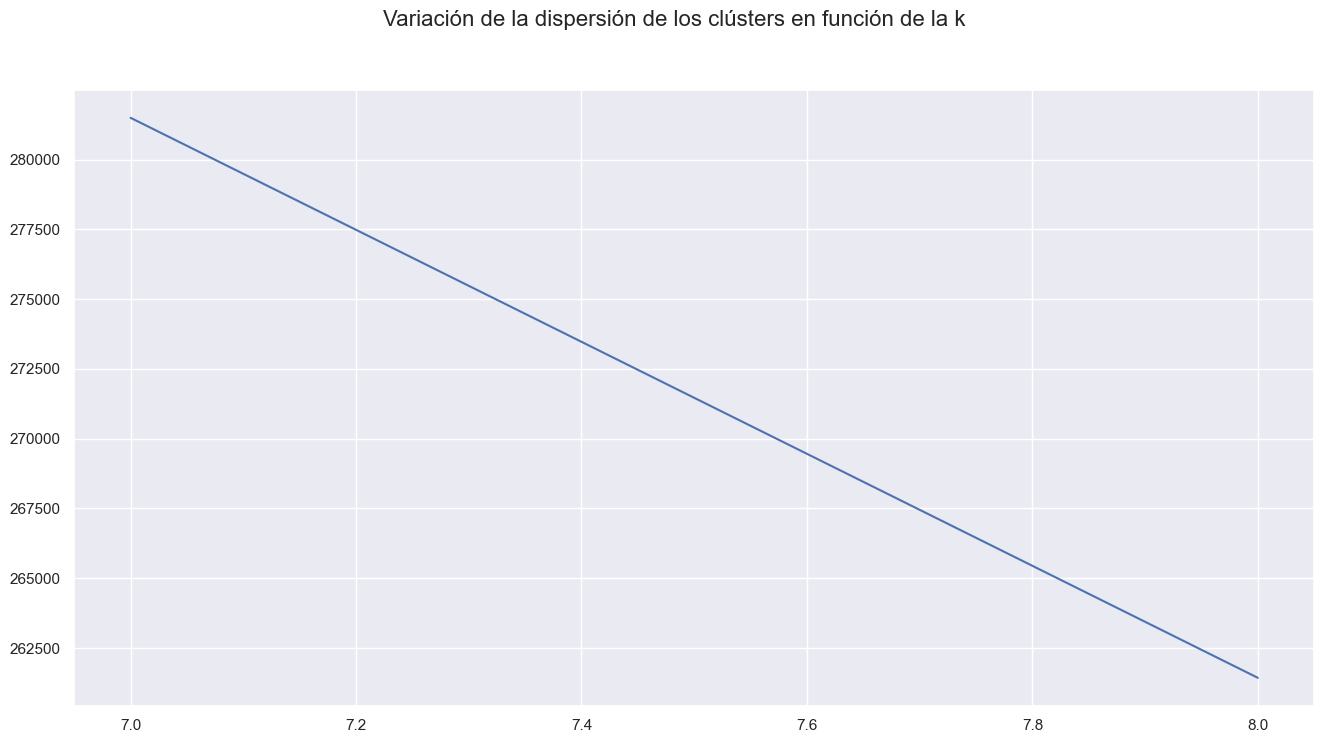

In [83]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

### Aplicación de Kmeans con k=7

In [114]:
pipe_KMeans = Pipeline(steps = [
    ("Clustering", KMeans(n_clusters = 7, random_state = 175))
])

In [115]:
pipe_KMeans.fit(df_capstone_clean_2_last_partition_for_cluster_scaled_transformed)

Pipeline(steps=[('Clustering', KMeans(n_clusters=7, random_state=175))])

In [116]:
pipe_KMeans[0].cluster_centers_.shape

(7, 20)

In [117]:
pipe_KMeans[0].cluster_centers_[0]

array([-4.39578929e-15, -4.01900735e-14,  1.00000000e+00, -9.11922655e-03,
        1.79200336e-03,  8.23379654e-04,  4.60012866e-01, -2.86402157e-03,
        2.68615021e-05,  8.95383405e-06, -4.94699330e-03,  1.99222807e-03,
       -3.93968697e-04,  2.56769948e-01,  6.77357545e-03,  1.79483673e-03,
        8.95383405e-06, -2.82941155e-03,  1.24844066e-02, -5.50232603e-17])

In [118]:
X_results = pipe_KMeans.transform(df_capstone_clean_2_last_partition_for_cluster_scaled_transformed)

In [119]:
X_results.head(3)

,kmeans0,kmeans1,kmeans2,kmeans3,kmeans4,kmeans5,kmeans6
16063,2.096213,2.548021,0.951245,1.694074,1.851173,0.978076,1.780613
16203,2.162669,2.472589,1.889175,1.960696,1.833791,1.553048,1.951159
16502,2.274964,2.137798,1.742387,1.532793,1.935788,1.002142,2.240984


In [120]:
labels = pipe_KMeans.predict(df_capstone_clean_2_last_partition_for_cluster_scaled_transformed)

In [121]:
len(labels)

442995

In [122]:
df_capstone_clean_2_last_partition_for_cluster_with_labels = df_capstone_clean_2_last_partition_for_cluster

In [123]:
pipe

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale_numeric_columns',
                                                  RobustScaler(quantile_range=(10.0,
                                                                               99.0)),
                                                  ['age',
                                                   'financial_health_score',
                                                   'total_profit_customer',
                                                   'months_from_last_purchase',
                                                   'product_mix_diversity',
                                                   'nr_financing_60',
                                                   'nr_invest_savings_40',
                                                   'nr_account_10', 'nr_debt',
                                                   'nr_product_trend',
                                                   'customer_tenure',
                                                   'nr_product_gap_to_max',
                                                   'nr_transactions',
                                                   'saving_behavior',
                                                   'risk_index_absolute',
                                                   'active_customer_rate'])],
                                   verbose_feature_names_out=False)),
                ('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe_cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['segment'])],
                                   verbose_feature_names_out=False))])

In [124]:
pipe[1]

ColumnTransformer(remainder='passthrough',
                  transformers=[('oe_cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['segment'])],
                  verbose_feature_names_out=False)

In [125]:
df_capstone_clean_2_last_partition_for_cluster_with_labels = pipe[1].transform(df_capstone_clean_2_last_partition_for_cluster_with_labels)

In [126]:
# le asignamos al DataFrame procesado el clúster.
# si lo hacemos al df escalado será más díficil de interpretar los resultados porque los números están escalados

df_capstone_clean_2_last_partition_for_cluster_with_labels["cluster"] = labels

In [127]:
df_capstone_clean_2_last_partition_for_cluster_with_labels.head()

,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,age,financial_health_score,total_profit_customer,months_from_last_purchase,product_mix_diversity,nr_financing_60,nr_invest_savings_40,nr_account_10,nr_debt,nr_product_trend,customer_tenure,nr_product_gap_to_max,nr_transactions,saving_behavior,risk_index_absolute,active_customer_rate,loan_utilization_index,cluster
16063,0.0,1.0,0.0,62,0.001765,0.0,6,0.000000,0,0,0,0,0.0,190,0,0.0,0,0,0.714286,0,2
16203,1.0,0.0,0.0,70,0.002249,10.0,4,0.083333,0,0,1,0,0.0,156,0,1.0,0,1,0.833333,0,5
16502,0.0,1.0,0.0,58,0.001671,20.0,4,0.166667,0,0,2,0,0.0,240,0,2.0,0,3,0.888889,0,5
17457,0.0,1.0,0.0,54,0.168439,340.0,0,0.205556,1,1,1,1,1.0,619,0,11.0,1,1,1.000000,0,1
17590,0.0,1.0,0.0,55,0.007048,0.0,10,0.000000,0,0,0,0,0.0,891,0,0.0,0,0,1.000000,0,5


In [128]:
df_capstone_clean_2_last_partition_for_cluster_with_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442995 entries, 16063 to 1553689
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   segment_01 - TOP            442995 non-null  float64
 1   segment_02 - PARTICULARES   442995 non-null  float64
 2   segment_03 - UNIVERSITARIO  442995 non-null  float64
 3   age                         442995 non-null  int64  
 4   financial_health_score      442995 non-null  float64
 5   total_profit_customer       442995 non-null  float64
 6   months_from_last_purchase   442995 non-null  int64  
 7   product_mix_diversity       442995 non-null  float64
 8   nr_financing_60             442995 non-null  int64  
 9   nr_invest_savings_40        442995 non-null  int64  
 10  nr_account_10               442995 non-null  int64  
 11  nr_debt                     442995 non-null  int64  
 12  nr_product_trend            442995 non-null  float64
 13  customer_

In [129]:
pd.set_option('display.max_columns', None)

df_capstone_clean_2_last_partition_for_cluster_with_labels.head()

,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,age,financial_health_score,total_profit_customer,months_from_last_purchase,product_mix_diversity,nr_financing_60,nr_invest_savings_40,nr_account_10,nr_debt,nr_product_trend,customer_tenure,nr_product_gap_to_max,nr_transactions,saving_behavior,risk_index_absolute,active_customer_rate,loan_utilization_index,cluster
16063,0.0,1.0,0.0,62,0.001765,0.0,6,0.000000,0,0,0,0,0.0,190,0,0.0,0,0,0.714286,0,2
16203,1.0,0.0,0.0,70,0.002249,10.0,4,0.083333,0,0,1,0,0.0,156,0,1.0,0,1,0.833333,0,5
16502,0.0,1.0,0.0,58,0.001671,20.0,4,0.166667,0,0,2,0,0.0,240,0,2.0,0,3,0.888889,0,5
17457,0.0,1.0,0.0,54,0.168439,340.0,0,0.205556,1,1,1,1,1.0,619,0,11.0,1,1,1.000000,0,1
17590,0.0,1.0,0.0,55,0.007048,0.0,10,0.000000,0,0,0,0,0.0,891,0,0.0,0,0,1.000000,0,5


In [130]:
df_capstone_clean_2_last_partition_for_cluster_with_labels.describe()

,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,age,financial_health_score,total_profit_customer,months_from_last_purchase,product_mix_diversity,nr_financing_60,nr_invest_savings_40,nr_account_10,nr_debt,nr_product_trend,customer_tenure,nr_product_gap_to_max,nr_transactions,saving_behavior,risk_index_absolute,active_customer_rate,loan_utilization_index,cluster
count,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000
mean,0.016244,0.339591,0.644165,30.401639,0.010695,17.145634,10.868987,0.075820,0.108613,0.060019,0.821668,0.159428,0.009838,737.281324,0.138065,0.801018,0.060019,0.881572,0.389346,0.000156,3.036086
std,0.126413,0.473571,0.478766,12.239800,0.038145,48.881586,5.219867,0.059666,0.334002,0.251562,0.571505,0.400607,0.290946,433.493121,0.458245,2.177460,0.251562,0.709616,0.464666,0.012479,2.275207
min,0.000000,0.000000,0.000000,2.000000,0.000021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,22.000000,0.001327,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,302.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,25.000000,0.001519,0.000000,10.000000,0.083333,0.000000,0.000000,1.000000,0.000000,0.000000,667.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000
75%,0.000000,1.000000,1.000000,35.000000,0.002055,0.000000,16.000000,0.083333,0.000000,0.000000,1.000000,0.000000,0.000000,1039.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000
max,1.000000,1.000000,1.000000,105.000000,0.500000,690.000000,16.000000,0.572222,3.000000,4.000000,4.000000,3.000000,5.000000,1608.000000,7.000000,37.000000,4.000000,3.000000,1.000000,1.000000,6.000000


### Definición de Ficha de Cliente 

In [131]:
ficha_df = pd.DataFrame()

# for i, col in enumerate(["age", "salary", "segment_01 - TOP", "segment_02 - PARTICULARES", "segment_03 - UNIVERSITARIO", "periods_active", "customer_tenure", "entry_date_month", "months_from_last_purchase", "digital_interaction_index", "financial_health_score", "saving_behavior", "risk_index_absolute", "nr_accounts", "nr_investment", "nr_debt", "clients_losing_fidelity", "product_mix_diversity_greater_than_75_percentile", "entry_channel_loyalty"]):
#     resumen_data = df_capstone_clean_2_last_partition_for_cluster_with_labels[["cluster", col]].groupby("cluster").describe().T[1:].round(4)
#     #ficha_df = ficha_df.append(resumen_data)
#     ficha_df = pd.concat([ficha_df, resumen_data])

cols = df_capstone_clean_2_last_partition_for_cluster_with_labels.columns.tolist()
cols.remove("cluster")
for i, col in enumerate(cols):
    #resumen_data = df_capstone_clean_2_last_partition_for_cluster_with_labels[["cluster", col]].groupby("cluster").describe().T[1:].round(4)
    resumen_data = df_capstone_clean_2_last_partition_for_cluster_with_labels[["cluster", col]].groupby("cluster").describe().T[1:].round(4)
    #ficha_df = ficha_df.append(resumen_data)
    ficha_df = pd.concat([ficha_df, resumen_data])

In [132]:
# generamos nuestro multiindex
out_index = [
"Segmento (social)",
"Segmento (social)",
"Segmento (social)",
"Edad",
"Economía",
"Economía",
"Frecuencia",
"Productos",
"Productos",
"Productos",
"Productos",
"Productos",
"Tendencia (compras)",
"Relacionamiento",
"Relacionamiento",
"Comportamiento",
"Comportamiento",
"Comportamiento",
"Comportamiento",
"Comportamiento",
]

inner_index = [
"Top", 
"Particulares", 
"Universitario", 
"Edad", 
"Salud Financiera", 
"Ganáncia Total Generada",
"Meses desde la ultima compra",
"Diversificación de Productos",
'Productos Financiación',
"Productos Inversiones y ahorro",
'Productos Cuentas EasyMoney',
'Productos préstamos (a solas)',
"Tendencia de compra ultimo mes",
 "Tenencia del cliente",
"Fidelización", 
"Transaciones",
"Comportamiento Ahorro", 
"Aptitud a Riesgo", 
"Digtitalización - índice",
'Préstamos - índice']

estadisticos = ["Media", "Desviación", "Mínimo", "Perc. 25", "Perc. 50", "Perc. 75", "Máximo"]

new_multi_index = []

for oi, ii, in zip(out_index, inner_index):
    for es in estadisticos:
        new_multi_index.append((oi, ii, es))

In [133]:
def generate_multiindex(list_of_tuples, names):
    return pd.MultiIndex.from_tuples(list_of_tuples, names = names)

names = ["Grupo Indicadores", "Indicador", "Estadístico"]
index_ficha = generate_multiindex(new_multi_index, names)
ficha_df.set_index(index_ficha, inplace = True)
index_ficha

MultiIndex([('Segmento (social)',                      'Top',      'Media'),
            ('Segmento (social)',                      'Top', 'Desviación'),
            ('Segmento (social)',                      'Top',     'Mínimo'),
            ('Segmento (social)',                      'Top',   'Perc. 25'),
            ('Segmento (social)',                      'Top',   'Perc. 50'),
            ('Segmento (social)',                      'Top',   'Perc. 75'),
            ('Segmento (social)',                      'Top',     'Máximo'),
            ('Segmento (social)',             'Particulares',      'Media'),
            ('Segmento (social)',             'Particulares', 'Desviación'),
            ('Segmento (social)',             'Particulares',     'Mínimo'),
            ...
            (   'Comportamiento', 'Digtitalización - índice',   'Perc. 50'),
            (   'Comportamiento', 'Digtitalización - índice',   'Perc. 75'),
            (   'Comportamiento', 'Digtitalización - índice'

In [134]:
tamaño_clusters = df_capstone_clean_2_last_partition_for_cluster_with_labels.groupby("cluster").size().to_frame().T
tamaño_clusters.set_index(generate_multiindex([("General", "Clúster", "Tamaño")] , names), inplace = True)
tamaño_clusters

,,cluster,0,1,2,3,4,5,6
Grupo Indicadores,Indicador,Estadístico,,,,,,,
General,Clúster,Tamaño,111684,24512,59824,28955,69713,54748,93559


In [135]:
ficha_df = pd.concat([tamaño_clusters, ficha_df])
ficha_df

cluster                                                  0           1  \
Grupo Indicadores Indicador          Estadístico                         
General           Clúster            Tamaño       111684.0  24512.0000   
Segmento (social) Top                Media             0.0      0.1568   
                                     Desviación        0.0      0.3636   
                                     Mínimo            0.0      0.0000   
                                     Perc. 25          0.0      0.0000   
...                                                    ...         ...   
Comportamiento    Préstamos - índice Mínimo            0.0      0.0000   
                                     Perc. 25          0.0      0.0000   
                                     Perc. 50          0.0      0.0000   
                                     Perc. 75          0.0      0.0000   
                                     Máximo            0.0      1.0000   

cluster                                                    2          3  \
Grupo Indicadores Indicador          Estadístico                          
General           Clúster            Tamaño       59824.0000  28955.000   
Segmento (social) Top                Media            0.0007      0.012   
                                     Desviación       0.0268      0.109   
                                     Mínimo           0.0000      0.000   
                                     Perc. 25         0.0000      0.000   
...                                                      ...        ...   
Comportamiento    Préstamos - índice Mínimo           0.0000      0.000   
                                     Perc. 25         0.0000      0.000   
                                     Perc. 50         0.0000      0.000   
                                     Perc. 75         0.0000      0.000   
                                     Máximo           1.0000      1.000   

cluster                                                    4           5  \
Grupo Indicadores Indicador          Estadístico                           
General           Clúster            Tamaño       69713.0000  54748.0000   
Segmento (social) Top                Media            0.0003      0.0533   
                                     Desviación       0.0161      0.2246   
                                     Mínimo           0.0000      0.0000   
                                     Perc. 25         0.0000      0.0000   
...                                                      ...         ...   
Comportamiento    Préstamos - índice Mínimo           0.0000      0.0000   
                                     Perc. 25         0.0000      0.0000   
                                     Perc. 50         0.0000      0.0000   
                                     Perc. 75         0.0000      0.0000   
                                     Máximo           1.0000      0.0000   

cluster                                                    6  
Grupo Indicadores Indicador          Estadístico              
General           Clúster            Tamaño       93559.0000  
Segmento (social) Top                Media            0.0003  
                                     Desviación       0.0170  
                                     Mínimo           0.0000  
                                     Perc. 25         0.0000  
...                                                      ...  
Comportamiento    Préstamos - índice Mínimo           0.0000  
                                     Perc. 25         0.0000  
                                     Perc. 50         0.0000  
                                     Perc. 75         0.0000  
                                     Máximo           1.0000  

[141 rows x 7 columns]

In [136]:
ficha_df = ficha_df.rename(columns = {
    0: "Jóvenes universitarios (+-25 años) con bajo compromiso digital, poco activos, pocos productos (principalmente cuenta corriente). Son los más tenientes.",
    1: "Profesionales (+-41 años, predominantemente Particulares) financieramente estables. Contiene universitarios y la mayor representación de TOP. Alta diversificación de productos (inversiones y cuentas), activos, digitales, frecuentes, con aptitud al riesgo. Son los más rentables",
    2: "Profesionales experimentados (Particulares), con baja salud financiera, baja diversidad de productos, aptitud al riesgo y tendencia de compra. Son los más mayores (+-42 años). Poseen la menor diversidad de productos (cuentas y algunos préstamos/hipotecas)",
    3: "Profesionales financieramente estables (+-39 años, predominantemente Particulares). Contiene universitarios y TOP. Alta diversificación de productos (financieros - préstamos e hipotecas), activos, digitales, frecuentes, con aptitud al riesgo. Segundo grupo más rentable. Posee el menor grado histórico de fidelidad",
    4: "Universitarios (+-24 años). Son digitales, con leve diversificación de productos (concentran cuentas corrientes), baja salud financiera. Presenta menor tendencia de compra. Son los universitarios más digitales",
    5: "Profesionales (predominantemente Particulares, TOP) experimentados (+- 42 años). Son digitales, con pocas transacciones y con diversidad moderada de productos. Tercer grupo más rentable para el banco y segundo con menor índice histórico de fidelización",
    6: "Estudiantes universitarios (+- 23 años) con menor tenencia, baja diversificación de productos (concentran cuentas corrientes), poco activos y poco digitales. Son los más jóvenes"
})




### Ficha Cliente 

In [137]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)

### Ficha Cliente Resumida (media)

In [138]:
#Generar ficha resumida

def highlight_min_rowwise(s):
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]

indices_mean = ficha_df[ficha_df.index.get_level_values(2).str.contains("Me")].index
ficha_df.loc[indices_mean].style.background_gradient(cmap='Blues', axis=1).apply(highlight_min_rowwise, axis=1)

### Informe: Perfil del cliente en cada cluster

| Cluster | Nombre del Cluster                    | Descripción                                                                                           | Perfil                                                                                                                     | Puntos Fuertes                                                                              | Puntos Débiles                                                                       | Persona                                              | Dificultades                                 | Oportunidades                                                                                      |
|---------|--------------------------------------|-------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------|------------------------------------------------------|----------------------------------------------|----------------------------------------------------------------------------------------------------|
| 0       | El Estudiante Prudente              | Jóvenes con baja actividad financiera pero alta tenencia en cuentas.                                   | Mayoría del segmento "UNIVERSITARIO". Edad promedio más baja (+-24 años). Bajas ganancias generadas. Baja diversidad de productos. | Alta propensión para adquirir productos de cuentas. Baja propensión para el endeudamiento. Alta tenencia.           | Baja diversificación de productos. Baja participación digital. Poco activo y poco frecuente. | Estudiantes universitarios o jóvenes adultos.      | Necesidad de educación financiera.             | Ofrecer productos de inversión y financiamiento adaptados a los jóvenes.                        |
| 1       | El Inversor Acomodado              | Profesionales estables buscando diversificación e inversión.                                            | Predominantemente del segmento "PARTICULARES". Mayor representatividad del segmento TOP. Edad promedio más alta (+-42 años). Altas ganancias generadas. Alta diversidad de productos.       | Alta propensión para adquirir productos de inversión y financiamiento. Alta diversificación de productos.           | Grado de fidelización intermedio.           | Profesionales financieramente estables.           | Necesidad de productos financieros diferenciados | Asesoramiento personalizado para identificar.                                                        |
| 2       | El Ahorrador Tradicional            | Personas de ingresos medios con preferencia por cuentas de ahorro básicas.                               | Predominantemente del segmento "PARTICULARES". Edad promedio alta (+-42 años). Bajas ganancias generadas. Baja diversidad de productos.                                                   | Alta propensión para adquirir productos de cuentas.                                                                                                                   | Baja diversificación de productos. Baja participación digital. Bajo comportamiento de inversiones y ahorros. | Profesionales experimentados o personas con ingresos medios. | Dificultad para ahorrar.                       | Ofrecer servicios de consultoría financiera personalizada.                                        |
| 3       | El Financiero Diversificado         | Usuarios activos y digitales con inclinación hacia financiamiento e inversión.                           | Diversidad de segmentos. Edad promedio intermedia (+-38 años). Altas ganancias generadas. Alta diversidad de productos.                                                                   | Alta propensión para adquirir productos de financiamiento e inversión, con énfasis en préstamos e hipotecas. Alta diversificación de productos. Activos y digitales. | Baja tendencia de compra en el último mes. Menor índice de fidelización.                                 | Profesionales financieramente estables con preferencia por la diversificación. | Necesidad de servicios de consultoría para maximizar inversiones. | Desarrollar programas de fidelización personalizados para aumentar la retención.                  |
| 4       | El Universitario Inversor          | Estudiantes o jóvenes profesionales enfocados en financiamiento e inversión digital.                     | Predominio del segmento UNIVERSITARIO. Edad promedio baja (+-24 años). Ganancias generadas moderadas. Diversificación moderada de productos.                                         | Alta propensión para adquirir productos de financiamiento e inversión entre universitarios. Digitales. | Baja tendencia de compra en el último mes. Baja salud financiera.                                       | Jóvenes profesionales o estudiantes universitarios con ingresos medios. | Necesidad de orientación financiera para maximizar el potencial de inversión. | Desarrollar programas de educación financiera e incentivos para aumentar la fidelidad.             |
| 5       | El Cliente Conservador Digital     | Profesionales experimentados con interés en servicios digitales financieros.                              | Predominantemente del segmento "PARTICULARES". Edad promedio alta, la más alta (+-42,2 años). Ganancias generadas moderadas. Baja diversificación de productos (cuentas y préstamos/hipotecas). | Digitales.                                                                                                  | Baja tendencia de compra en el último mes. Bajo grado de fidelización.                                    | Profesionales experimentados con necesidades financieras diversificadas. | Necesidad de servicios de consultoría financiera personalizada. | Desarrollar servicios digitales innovadores para atraer clientes más jóvenes y aumentar el compromiso, especialmente en términos de financiamiento. |
| 6       | El Joven Ahorrador                 | Estudiantes universitarios con interés moderado en productos de cuentas y educación financiera.         | Mayoritariamente del segmento "UNIVERSITARIO". Edad promedio baja, la menor (+-22,72 años). Bajo lucro total generado. Baja diversificación de productos.                                 | Mayor propensión para adquirir productos de cuentas. Recurrencia intermedia de compra.                        | Baja diversificación de productos. Bajo compromiso digital. Baja tenencia.                                 | Estudiantes universitarios o jóvenes adultos.      | Necesidad de educación financiera.             | Ofrecer productos de inversión y financiamiento adaptados a los jóvenes.                        |


### Graficos: Perfil del cliente en cada cluster

In [139]:
# Aplicación de escalado MinMax para que se pueda realizar comparaciones entre los perfiles
x= ficha_df.loc[indices_mean].reset_index().drop(columns=["Grupo Indicadores","Estadístico" ])
x.set_index("Indicador", inplace=True)
x =x.T

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
df_normalized_T = df_normalized.T

#Reducir variables para el gráfico de radar
cols_gra = set(df_normalized_T.index) - set(["Préstamos - índice","Salud Financiera","Ganáncia Total Generada","Tenencia del cliente", "Comportamiento Ahorro"])
df_normalized_T = df_normalized_T.loc[cols_gra]

#Generar graficos

generar_grafico_radar(df_normalized_T.index, df_normalized_T[df_normalized_T.columns[0]],"Cluster 0","green")

In [140]:
generar_grafico_radar(df_normalized_T.index, df_normalized_T[df_normalized_T.columns[1]],"Cluster 1","blue")

In [141]:
generar_grafico_radar(df_normalized_T.index, df_normalized_T[df_normalized_T.columns[2]],"Cluster 2","seagreen")

In [142]:
generar_grafico_radar(df_normalized_T.index, df_normalized_T[df_normalized_T.columns[3]],"Cluster 3","red")


In [143]:
generar_grafico_radar(df_normalized_T.index, df_normalized_T[df_normalized_T.columns[4]],"Cluster 4","orange")

In [144]:
generar_grafico_radar(df_normalized_T.index, df_normalized_T[df_normalized_T.columns[5]],"Cluster 5","purple")

In [145]:
generar_grafico_radar(df_normalized_T.index, df_normalized_T[df_normalized_T.columns[6]],"Cluster 6","tomato")

array([[<Axes: title={'center': 'cluster'}>,
        <Axes: title={'center': 'value'}>]], dtype=object)

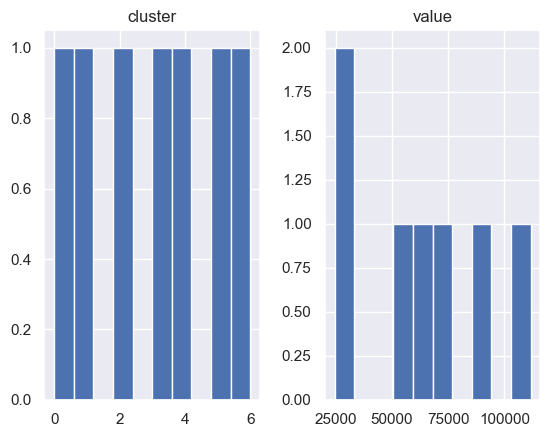

In [146]:
hist = ficha_df.iloc[:1].melt()
hist["cluster"] = [0,1,2,3,4,5,6]
hist.hist()

In [ ]:
# Guardamos pickle

DATA_PATH = "../../data/processed/"
FILE_NAME = "ficha_df.pkl.gz"
PICKLE_PATH = DATA_PATH+FILE_NAME

ficha_df.to_pickle(PICKLE_PATH, compression='gzip')

In [ ]:
# Guardamos pickle

DATA_PATH = "../../data/processed/"
FILE_NAME = "df_clusters.pkl.gz"
PICKLE_PATH = DATA_PATH+FILE_NAME

df_capstone_clean_2_last_partition_for_cluster_with_labels.to_pickle(PICKLE_PATH, compression='gzip')